<a href="https://colab.research.google.com/github/pkams/analise_de_consumo/blob/master/AnaliseEnergia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de diferença entre dois retificadores em linha de produção de cromo.

### Importando bibliotecas

In [55]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### Importando dados previamente manipulados em EXCEL

- A base completa tinha todos os dados do ano de 2020.
- Utilizando consumo de energia GERAL da fábrica. O objetivo é comparar o consumo geral antes e depois da troca do retificador por uma máquina nova. 
- Dias selecionados p/ máquina antiga: 02/03 até 10/03 (retirando sex,sab,dom)
- Dias selecionados p/ máquina nova: 27/07 até 04/08 (retirando sex,sab,dom)
- Horários selecionados: entre 6h e 15h.


In [56]:
# Lendo os arquivos
tel_03 = pd.read_excel('Telemetria_03.xlsx')
tel_08 = pd.read_excel('Telemetria_08.xlsx')

### Plotando as duas séries

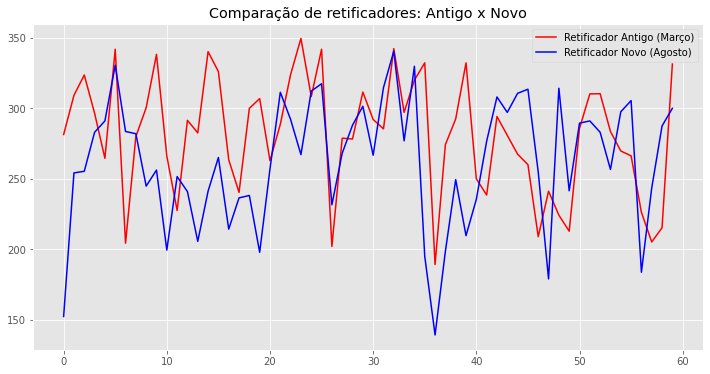

In [128]:
plt.figure(figsize=(12,6))
sns.lineplot(data = tel_03['kW'], color='red', label='Retificador Antigo (Março)')
sns.lineplot(data = tel_08['kW'], color= 'blue', label='Retificador Novo (Agosto)')
plt.title('Comparação de retificadores: Antigo x Novo')
plt.legend()

In [129]:
# Salvando em outro dataframe caso seja necessário usar dados originais
df_03 = tel_03.copy()
df_08 = tel_08.copy()

In [95]:
# Convertendo as colunas de data em datetime (com data e hora)
df_03['Data'] = pd.to_datetime(df_03['Data']+" "+df_03['Hora'].astype(str),format="%d/%m/%Y %H")
df_08['Data'] = pd.to_datetime(df_08['Data']+" "+df_08['Hora'].astype(str),format="%d/%m/%Y %H")
df_03.head()

,Unnamed: 0,Data,Hora,kW
0,0,2020-03-02 06:00:00,6,281.232
1,1,2020-03-02 07:00:00,7,309.024
2,2,2020-03-02 08:00:00,8,323.424
3,3,2020-03-02 09:00:00,9,296.352
4,4,2020-03-02 10:00:00,10,264.384


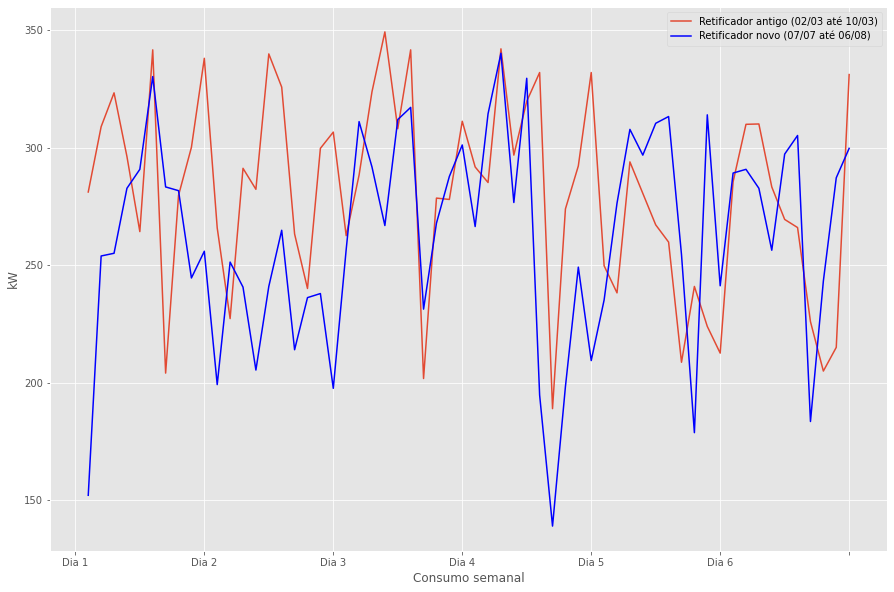

In [112]:
# Criando arrays para plotagem das datas e labels no gráfico
num_dias = df_03['Data'].dt.day.nunique() # qtde de dias unicos
len_data = len(df_03) # qtde de medições
df_range = np.arange(0,1+len_data,(len_data/num_dias)) # criando array para intervalos de medicoes
df_label = ['Dia 1','Dia 2','Dia 3','Dia 4','Dia 5', 'Dia 6'] # criando labels

# Plotando
plt.figure(figsize=(15,10))
sns.lineplot(x=range(1,len(df_03)+1),y='kW',data=df_03, label = 'Retificador antigo (02/03 até 10/03)')
sns.lineplot(x=range(1,len(df_08)+1),y='kW',data=df_08, color='blue', label='Retificador novo (07/07 até 06/08)')
plt.xticks(ticks=df_range,labels=df_label)
plt.xlabel('Consumo semanal')
plt.legend()

In [113]:
# Agrupando e médias de cada horário

media_horaria_ant = df_03.groupby('Hora').mean()['kW'].to_frame()
media_horaria_ant
media_horaria_nov = df_08.groupby('Hora').mean()['kW'].to_frame()
media_horaria_nov

media_horaria = media_horaria_ant
media_horaria.columns = ['Antes da troca do retificador (kW)']
media_horaria['Depois da troca do retificador (kW)'] = media_horaria_nov
media_horaria

,Antes da troca do retificador (kW),Depois da troca do retificador (kW)
Hora,,
6,272.856,233.232
7,276.408,283.080
8,314.160,286.464
9,298.176,264.240
10,294.864,296.904
11,311.232,287.664
12,215.568,217.704
13,253.128,234.456
14,268.272,270.192


Text(0, 0.5, 'Energia em kW')

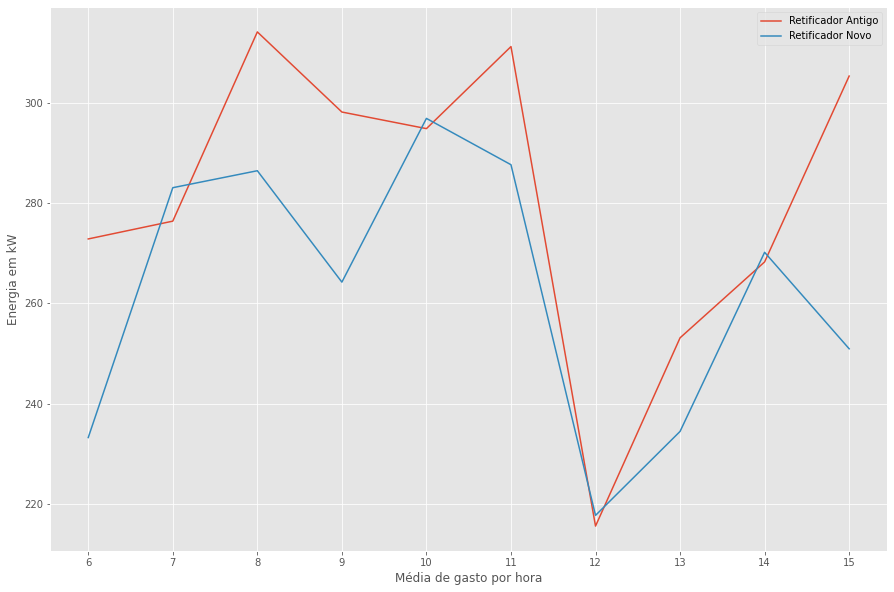

In [125]:
# Plotando as médias de cada horário 

df_range_med = np.arange(1,len(media_horaria)+1,1)
df_label_med = range(6,16)

plt.figure(figsize=(15,10))
sns.lineplot(range(1,len(media_horaria)+1),media_horaria.iloc[:,0], label='Retificador Antigo')
sns.lineplot(range(1,len(media_horaria)+1),media_horaria.iloc[:,1], label='Retificador Novo')
plt.xticks(ticks=df_range_med,labels=df_label_med)
plt.legend()
plt.xlabel('Média de gasto por hora')
plt.ylabel('Energia em kW')

In [86]:
# Resultados de gasto médio

media_ant = np.round(media_horaria.iloc[:,0].mean())
media_nov = np.round(media_horaria.iloc[:,1].mean())
print('Média de gasto com retificador antigo: ', media_ant, 'kW')
print('Média de gasto com retificador novo: ', media_nov, 'kW')
print('Redução média de:', np.round((1-(media_nov/media_ant)),2), '%')

Média de gasto com retificador antigo:  281.0 kW
Média de gasto com retificador novo:  262.0 kW
Redução média de: 6.76 %


### Mediana

In [87]:
# Mesmo processo anterior, só que agora usando medianas (menos sensivel a outliers).

median_horaria_ant = df_03.groupby('Hora').median()['kW'].to_frame()
median_horaria_ant
median_horaria_nov = df_08.groupby('Hora').median()['kW'].to_frame()
median_horaria_nov
median_horaria = median_horaria_ant
median_horaria.columns = ['Antes da troca do retificador (kW)']
median_horaria['Depois da troca do retificador (kW)'] = median_horaria_nov
median_horaria

,Antes da troca do retificador (kW),Depois da troca do retificador (kW)
Hora,,
6,273.600,246.024
7,286.848,283.680
8,316.800,287.352
9,289.872,271.872
10,288.864,303.912
11,328.968,309.312
12,206.496,222.768
13,257.544,239.832
14,285.192,268.272


Text(0, 0.5, 'Energia em kW')

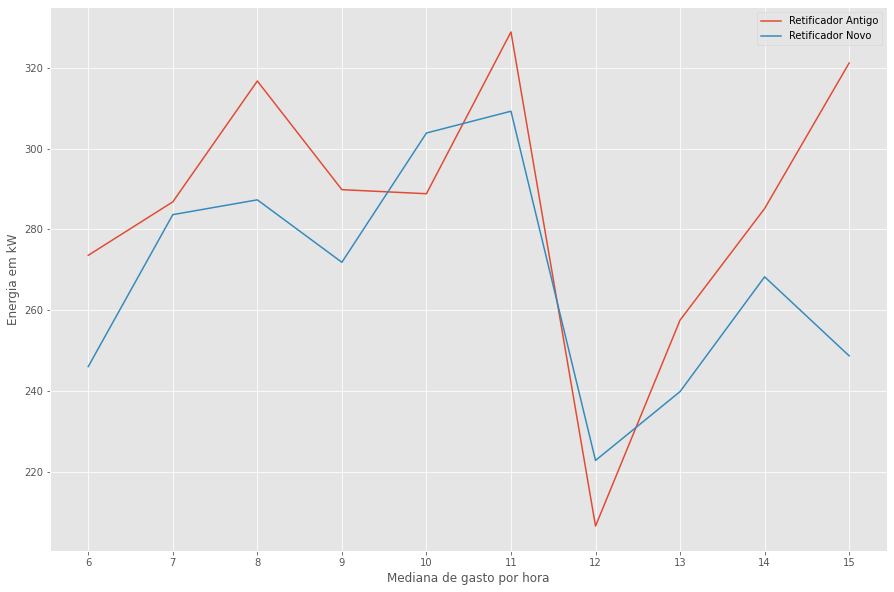

In [126]:
plt.figure(figsize=(15,10))
sns.lineplot(range(1,len(median_horaria)+1),median_horaria.iloc[:,0], label='Retificador Antigo')
sns.lineplot(range(1,len(median_horaria)+1),median_horaria.iloc[:,1], label='Retificador Novo')
plt.xticks(ticks=df_range_med,labels=df_label_med)
plt.legend()
plt.xlabel('Mediana de gasto por hora')
plt.ylabel('Energia em kW')

In [89]:
# Resultado das medianas

median_ant = np.round(median_horaria.iloc[:,0].median())
median_nov = np.round(median_horaria.iloc[:,1].median())
print('Mediana de gasto com retificador antigo: ', median_ant, 'kW')
print('Mediana de gasto com retificador novo: ', median_nov, 'kW')
print('Redução mediana de:', np.round(100*(1-(median_nov/median_ant)),2), '%')

Mediana de gasto com retificador antigo:  288.0 kW
Mediana de gasto com retificador novo:  270.0 kW
Redução mediana de: 6.25 %


### Conclusões:

- Foram comparados 6 dias de cada época. O ideal seriam comparar grandes períodos de tempo, mas a máquina nova estava a pouco tempo na empresa e a pandemia impediu utilizar dias de semanas anteriores devido a produção atípica que iria prejudicar a medição. 

- Com o passar do tempo será possível analisar mais a máquina nova, pois diariamente se cria novos dados relacionadas a ela. Após algum tempo será possível comparar estes novos dados com a base de dados histórica dos retificadores antigos e tirar melhores conclusões. 

- O impacto na economia **geral** da fábrica devido a nova máquina é perto dos 7%.